# Jupyter Notebook

## Notebook headers:
Logo and title:
<div style="display:block">
    <div style="width: 14%; display: inline-block; text-align: left;">
        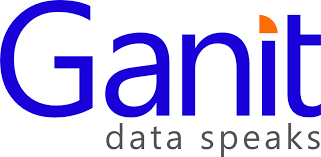
    </div>
    <div style="width: 70%; display: inline-block">
        <h5  style="color:#1A00D9; text-align: center; font-size:28px;">Understanding LR using gradient descent</h5>
        <div style="color:#226BD6; width: 90%; text-align: center; display: inline-block;"><i>Author(s): </i> <strong>Vaibhav</strong> </div>
    </div>
    <div style="color:#226BD6; width: 15%; text-align: right; display: inline-block;">
        <div style="color:#226BD6; width: 100%; text-align: left; display: inline-block;">
            <i>Created : Sep 16th, 2022</i></br>
            <i>Modified: Sep 16th, 2022</i>
        </div>
    </div>
</div>

<font color="#226BD6">**Purpose:**</font>  
<!-- Enter purpose below -->
Underrstanding Multiple Linear Regression using Gradient Descent

<font color="#226BD6">**User Inputs:**</font>  
- **PATH_DIR_DATA**: (variable) Folder containing ..
- **PATH_OUTPUT_EXCEL**: (variable) Name of the output file 

## What is regression?

Simple linear regression is a statistical technique for finding the existence
of an association relationship between a dependent variable (aka
response variable or outcome variable) and an independent variable (aka explanatory variable or predictor variable). Simple linear
regression implies that there is only one independent variable in
the model.



However, in practical scenarios we have more than one independent variable which is a case of multiple linear regression
$$\begin{align}
        Y&=\theta_{0}+\theta_{1}\times X_{1} + \theta_{2}\times X_{2} + \epsilon
\end{align}$$

Regression searches for relationships among <b>variables</b>. For example, you can observe several employees of some company and try to understand how their salaries depend on their <b>features</b>, such as experience, education level, role, city of employment, and so on.

This is a regression problem where data related to each employee represents one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.

Similarly, you can try to establish the mathematical dependence of housing prices on area, number of bedrooms, distance to the city center, and so on.

Generally, in regression analysis, you consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you try to establish a relation among them.

<b><i>Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error..</i></b>



## Why do we need regression 

Linear regression has two primary purposes—understanding the relationships between variables and forecasting.

- The coefficients represent the estimated magnitude and direction (positive/negative) of the relationship between each independent variable and the dependent variable.
- A linear regression equation allows you to predict the mean value of the dependent variable given values of the independent variables that you specify.

## How do we get the best params-  Gradient Descent

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.`

![gd](C:\Users\vaibhav.sikka\Desktop\ML_Practice\Gradient_descent.jpeg)

Imagine a valley and a person with no sense of direction who wants to get to the bottom of the valley. He goes down the slope and takes large steps when the slope is steep and small steps when the slope is less steep. He decides his next position based on his current position and stops when he gets to the bottom of the valley which was his goal.
Let’s try applying gradient descent to m and c and approach it step by step:

1. Initially let m = 0 and c = 0. Let L be our learning rate. This controls how much the value of m changes with each step. L could be a small value like 0.0001 for good accuracy.
2. Calculate the partial derivative of the loss function with respect to m, and plug in the current values of x, y, m and c in it to obtain the derivative value D.

$$ D_{m}= 1/n \sum_{i=0}^{n} 2(y_{i}-(mx_{i}+c))(-x_{i}) $$ 

$$ D_{m}= -2/n \sum_{i=0}^{n} x_{i}(y_{i}-\hat{y_{i}}) $$ 

Dₘ is the value of the partial derivative with respect to m. Similarly lets find the partial derivative with respect to c, Dc :

$$ D_{c}= -2/n \sum_{i=0}^{n} (y_{i}-\hat{y_{i}}) $$ 

3. Now we update the current value of m and c using the following equation:

$$ m=m-L \times D_{m}$$
$$ c=c-L \times D_{c}$$

4. We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy). The value of m and c that we are left with now will be the optimum values

Now going back to our analogy, m can be considered the current position of the person. D is equivalent to the steepness of the slope and L can be the speed with which he moves. Now the new value of m that we calculate using the above equation will be his next position, and L×D will be the size of the steps he will take. When the slope is more steep (D is more) he takes longer steps and when it is less steep (D is less), he takes smaller steps. Finally he arrives at the bottom of the valley which corresponds to our loss = 0.
Now with the optimum value of m and c our model is ready to make predictions !

## Model Assmptions

We need to check few assumption of linear regression model. The common assumption for Linear Regression model are following

- <b>Linear Relationship</b>: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
- The residual <b>error plot should be normally distributed.</b>
- The mean of residual error should be 0 or close to 0 as much as possible
- The linear regression require all variables to be multivariate normal.This assumption can best checked with Q-Q plot.
- Linear regession assumes that there is <b>little or no Multicollinearity in the data</b>. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=11−R2 , If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
- <b>Homoscedasticity</b>: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

<b><i>In the regression model, the output variable, which has to be predicted, should be a continuous variable, such as predicting the insurance charges for a particular person.</i> </b> 



<font color="blue">

In the later sections we will check for all these assumptions
</font>

## Loading the  required libraries and data

In [7]:
## Logger

import logging
logging.basicConfig(
    level=logging.DEBUG,
    datefmt='%Y%m%d_%H%M%S',
    
    #Format for jupyter notebooks
    format="%(asctime)s - %(levelname)s - %(message)s",
    
    # Format for python scripts
    # format="%(asctime)s %(threadName)s %(name)s - %(levelname)s - %(message)s", #For scripts
    # filename=log_file, #For writing to files. Leave commented out if logs need to be printed to stream
    # filemode=filemode_val, #append or write.
)
log = logging.getLogger() #Use the log variable to print outputs

In [8]:
import pandas as pd

#pd.set_option("plotting.backend", "plotly")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.precision", 3)

## Get datetime suffix for files

from datetime import date
get_date_yyyymmdd = lambda: date.today().strftime('%Y%m%d')

In [9]:
# Plotly

import plotly.io as pio
import plotly.graph_objs as go

# Define Plotly template
def get_custom_template():
    template = go.layout.Template(
        layout_annotations=[
            dict(
                textangle=-30,
                opacity=0.1,
                font=dict(color="black", size=100),
                xref="paper",
                yref="paper",
                x=0.5,
                y=0.5,
                showarrow=True,
                arrowhead=8,
            )
        ],
        layout_coloraxis=dict(
            colorbar=dict(outlinewidth=110, tickcolor="black", outlinecolor="yellow")
        ),
        layout_annotationdefaults=dict(font=dict(color="#ff0000")),
        layout_title=dict(
            x=0.5, y=0.9, font=dict(family="Segoe UI", color="#000000", size=30)
        ),
        layout_font=dict(color="#2a3f5f"),
        layout_plot_bgcolor="white",
        layout_xaxis=dict(
            tickmode="auto",
            automargin=True,
            gridcolor="#F3F3F3",
            linecolor="#F3F3F3",
            ticks="",
            title=dict(
                font=dict(family="Segoe UI", color="#44546a", size=20), standoff=15
            ),
            zerolinecolor="Black",
            zerolinewidth=1,
        ),
        layout_yaxis=dict(
            tickmode="auto",
            automargin=True,
            gridcolor="#F3F3F3",
            linecolor="#F3F3F3",
            ticks="",
            title=dict(
                font=dict(family="Segoe UI", color="#44546a", size=20), standoff=15
            ),
            zerolinecolor="Black",
            zerolinewidth=1,
        ),
        layout_scene=dict(
            xaxis=dict(
                backgroundcolor="#1a00d9",
                gridcolor="#DFE8F3",
                gridwidth=2,
                linecolor="#EBF0F8",
                showbackground=True,
                ticks="",
                zerolinecolor="#EBF0F8",
            ),
            yaxis=dict(
                backgroundcolor="#1a00d9",
                gridcolor="#DFE8F3",
                gridwidth=2,
                linecolor="#EBF0F8",
                showbackground=True,
                ticks="",
                zerolinecolor="#EBF0F8",
            ),
            zaxis=dict(
                backgroundcolor="#1a00d9",
                gridcolor="#DFE8F3",
                gridwidth=2,
                linecolor="#EBF0F8",
                showbackground=True,
                ticks="",
                zerolinecolor="#EBF0F8",
            ),
        ),
        layout_mapbox=dict(style="carto-darkmatter"),
        layout_colorway=[
            "#1a00d9",
            "#fe6e06",
            "#ffab31",
            "#ff0000",
            "#dbeaff",
            "#44546a",
        ],
        layout_legend=dict(
            x=1,
            traceorder="reversed",
            font=dict(family="Segoe UI", size=12, color="black"),
            bgcolor="#EBF0F8",
            bordercolor="Black",
            borderwidth=2,
        ),
        layout_colorscale=dict(
            diverging=[
                [0, "#8e0152"],
                [0.1, "#c51b7d"],
                [0.2, "#de77ae"],
                [0.3, "#f1b6da"],
                [0.4, "#fde0ef"],
                [0.5, "#f7f7f7"],
                [0.6, "#e6f5d0"],
                [0.7, "#b8e186"],
                [0.8, "#7fbc41"],
                [0.9, "#4d9221"],
                [1, "#276419"],
            ],
            sequential=[
                [0.0, "#0d0887"],
                [0.1111111111111111, "#46039f"],
                [0.2222222222222222, "#7201a8"],
                [0.3333333333333333, "#9c179e"],
                [0.4444444444444444, "#bd3786"],
                [0.5555555555555556, "#d8576b"],
                [0.6666666666666666, "#ed7953"],
                [0.7777777777777778, "#fb9f3a"],
                [0.8888888888888888, "#fdca26"],
                [1.0, "#f0f921"],
            ],
            sequentialminus=[
                [0.0, "#0d0887"],
                [0.1111111111111111, "#46039f"],
                [0.2222222222222222, "#7201a8"],
                [0.3333333333333333, "#9c179e"],
                [0.4444444444444444, "#bd3786"],
                [0.5555555555555556, "#d8576b"],
                [0.6666666666666666, "#ed7953"],
                [0.7777777777777778, "#fb9f3a"],
                [0.8888888888888888, "#fdca26"],
                [1.0, "#f0f921"],
            ],
        ),
        layout_hoverlabel=dict(
            align="left", bgcolor="white", font_size=16, font_family="Segoe UI"
        ),
        layout_hovermode="closest",
    )
    return template


pio.templates["ganit"] = get_custom_template()
# plotly_template = pio.templates["ganit"] #Use as a parameter in each plot call (template=plotly_template)
pio.templates.default = "ganit"  # Set default theme across all plots


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random as random
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

In [23]:
X.shape

(506, 13)

In [24]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [26]:
X=X[:,[0,2]]
X# two independent variables

array([[6.3200e-03, 2.3100e+00],
       [2.7310e-02, 7.0700e+00],
       [2.7290e-02, 7.0700e+00],
       ...,
       [6.0760e-02, 1.1930e+01],
       [1.0959e-01, 1.1930e+01],
       [4.7410e-02, 1.1930e+01]])

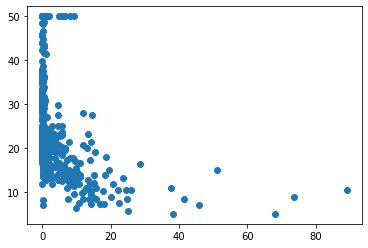

In [28]:
##Plots
X1 =X[:, 0]
plt.scatter(X1, Y)
plt.show()

In [29]:
len(X1)

506

In [27]:
len(Y)

506

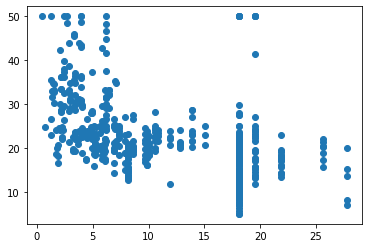

In [30]:
##Plots
X2 =X[:, 1]
plt.scatter(X2, Y)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.41978194, -1.2879095 ],
       [-0.41733926, -0.59338101],
       [-0.41734159, -0.59338101],
       ...,
       [-0.41344658,  0.11573841],
       [-0.40776407,  0.11573841],
       [-0.41500016,  0.11573841]])

In [32]:
'''def predicted_y(weight,x,intercept):
    return weight@x+intercept
    

# linear loss
def loss(y,y_predicted):
    n=X.shape[0]
    s=(y-y_predicted)**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    n=X.shape[0]
    s=-x*(y-y_predicted)
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=X.shape[0]
    s=-(y-y_predicted)
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    
    for i in tqdm(range(epoch)):
        
        for j in range(n):
            random_index = random.randint(0,n-1)
            x_sample = x[random_index]
            y_sample = y[random_index]
            y_predicted = predicted_y(weight_vector,x_sample,intercept)
            # updation of weight and bias for every records
            weight_vector = weight_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
        linear_loss.append(loss(y_sample,y_predicted))    
        
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept,'''

In [ ]:
## Try animation here

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:05<00:00, 334.17it/s]


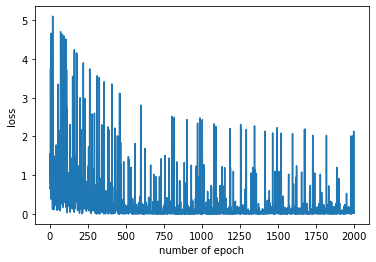

In [33]:
'''w,b=gradient_descent(X_transform,Y)
'''

In [45]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        # updation of weight and bias for every records

        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

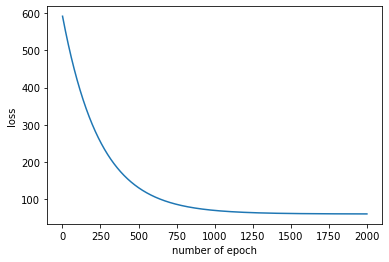

In [46]:
w,b=gradient_descent(X_transform,Y)


In [44]:
print("weight:",w)
print("bias:",b)

weight: [-2.23648679 -3.44932182]
bias: 22.121753289661854


In [34]:
'''print("weight:",w)
print("bias:",b)'''

weight: [-2.08676347 -3.56332368]
bias: 22.10270789415578


# pred

In [36]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)
y_pred=predict(X_transform)
y_pred

array([27.56793193, 25.08800484, 25.0880097 , 27.62919575, 27.62028825,
       27.62980771, 24.65725847, 24.6435961 , 24.62740087, 24.63740602,
       24.62408606, 24.6501723 , 24.65592526, 24.38538705, 24.38339573,
       24.38596259, 24.28238016, 24.34788231, 24.34338728, 24.36206437,
       24.23433116, 24.33140781, 24.23902289, 24.2982864 , 24.35612442,
       24.33420051, 24.3751512 , 24.30621767, 24.35060459, 24.29488174,
       24.26371036, 24.20933529, 24.20125589, 24.2586325 , 24.1466574 ,
       25.65616731, 25.64808791, 25.6522891 , 25.62924083, 27.23000671,
       27.22855936, 25.14687649, 25.14346211, 25.13912493, 25.14802999,
       25.13619624, 25.13208247, 25.12214774, 25.1161738 , 25.12445476,
       25.81657819, 25.82759356, 25.82510927, 25.82602965, 26.68749546,
       28.13299825, 28.38075416, 28.08071219, 26.06577885, 26.07820515,
       26.06702464, 26.06158738, 26.07650767, 26.07256633, 28.04825649,
       27.00964563, 27.00771502, 25.60050092, 25.58164413, 25.58

In [37]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,27.6
1,21.6,25.1
2,34.7,25.1
3,33.4,27.6
4,36.2,27.6
...,...,...
501,22.4,22.6
502,20.6,22.6
503,23.9,22.6
504,22.0,22.5


# sklearn

In [38]:

from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant')

In [39]:
print(model.intercept_)
print(model.coef_)


[22.56246]
[-2.08949518 -3.59435386]


In [40]:
w

array([-2.08676347, -3.56332368])

In [41]:
b

22.10270789415578